<a href="https://colab.research.google.com/github/Shreyansh452/DemoRepository/blob/master/cat_Dog_classification_Feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:04<00:00, 284MB/s]
100% 1.06G/1.06G [00:04<00:00, 256MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
conv_base.trainable = False

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [ ]:
# #generators
# train_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/train',
#     labels = 'inferred',
#     label_mode = 'int',
#     batch_size = 32,
#     image_size = (150, 150)
# )

# validation_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/test',
#     labels = 'inferred',
#     label_mode = 'int',
#     batch_size = 32,
#     image_size = (150, 150)
# )
#applying Data Augumentation
batch_size = 32

train_datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

# Validation data generator
validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

<ipython-input-13-b2b64d53260b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 225s 358ms/step - loss: 0.3041 - accuracy: 0.8697 - val_loss: 0.2482 - val_accuracy: 0.8896
Epoch 2/10
625/625 [==============================] - 222s 356ms/step - loss: 0.2318 - accuracy: 0.8995 - val_loss: 0.2303 - val_accuracy: 0.9008
Epoch 3/10
625/625 [==============================] - 224s 358ms/step - loss: 0.2248 - accuracy: 0.9051 - val_loss: 0.1944 - val_accuracy: 0.9180
Epoch 4/10
625/625 [==============================] - 225s 360ms/step - loss: 0.2126 - accuracy: 0.9093 - val_loss: 0.1944 - val_accuracy: 0.9162
Epoch 5/10
625/625 [==============================] - 225s 359ms/step - loss: 0.2061 - accuracy: 0.9129 - val_loss: 0.2041 - val_accuracy: 0.9146
Epoch 6/10
625/625 [==============================] - 225s 359ms/step - loss: 0.1898 - accuracy: 0.9195 - val_loss: 0.1873 - val_accuracy: 0.9190
Epoch 7/10
625/625 [==============================] - 224s 358ms/step - loss: 0.1849 - accuracy: 0.9212 - val_loss: 0.2350 -

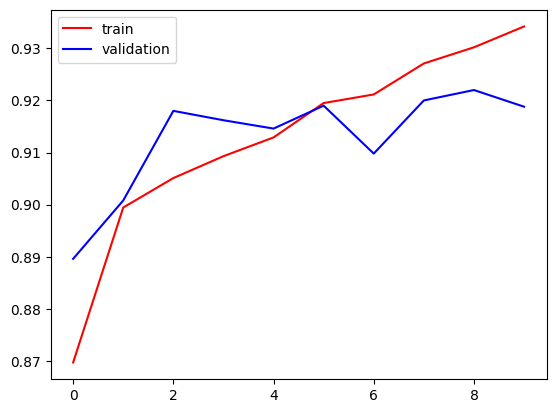

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

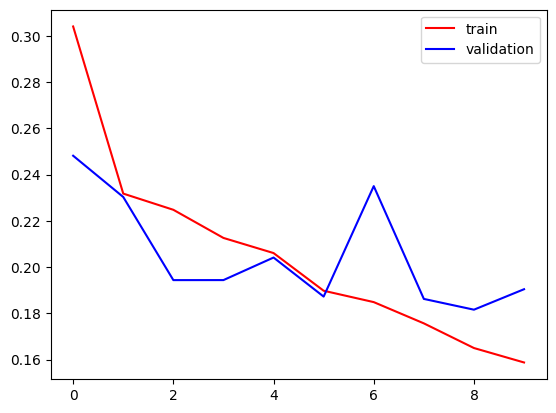

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()